# SciPy Optimization

In [1]:
# scientific computing library
import numpy as np
# optimization package
from scipy.optimize import minimize

# visualization tools
import matplotlib.pyplot as plt
import seaborn as sns

# show plots without need of calling `.show()`
%matplotlib inline

# prettify plots
plt.rcParams['figure.figsize'] = [20.0, 5.0]
sns.set_palette(sns.color_palette("muted"))
sns.set_style("ticks")

# supress warnings
import warnings
warnings.filterwarnings('ignore')

Find **global minimizer** of function $f$:
$$f(x) = x^{2} - 2x + 5sin(x), \quad x \in \mathcal{R}$$

In [2]:
# function definition
def f(x):
    return x**2 - 2*x + 5*np.sin(x)

Minimizer: [-0.77901491]
Message: Optimization terminated successfully.
Success: True


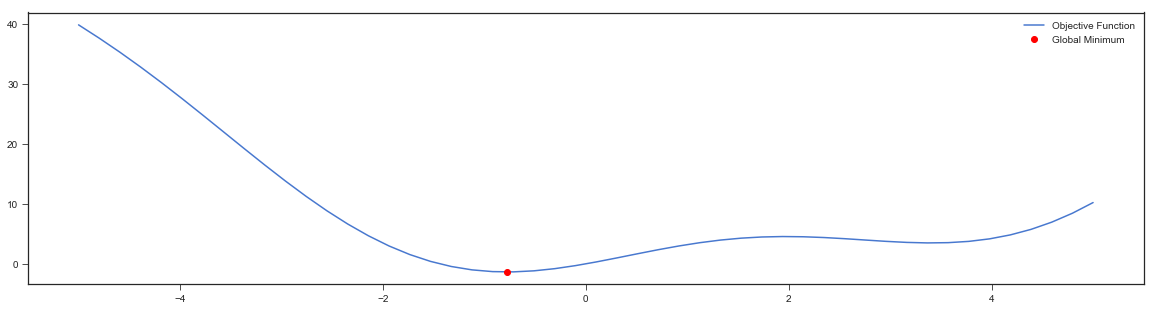

In [3]:
"""
`minimize(fun, x0, method, tol)`:
    
    Parameters
    ----------
    fun: callable
        Objective function
    x0: numpy.ndarray
        Initial guess
    str: string or callable
        Type of solver, consult
            [docs](https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.optimize.minimize.html)
    tol: float
        Tolerance for termination
   
    Returns
    -------
    result: OptimizeResult
        x: numpy.ndarray
            Minimum
        success: bool
            Status of optomization
        message: string
            Description of cause of termination
"""
result = minimize(fun=f, x0=np.random.randn())
# report
print("Minimizer:", result.x)
print("Message:", result.message)
print("Success:", result.success)

# visualization
t = np.linspace(-5, 5)
plt.plot(t, f(t), label='Objective Function')
plt.plot(result.x, f(result.x), 'ro', label='Global Minimum')
plt.legend();

### Task (Polynomial Optimization)

Convex optimization is a useful tool that can be applied to various objective functions.

**TODO**<br>
Use `scipy.optimize.minimize` function to minimize $f(x) = 2 - 9x + x^2, x \in \mathcal{R}$.

Minimizer: [ 4.50000003]
Message: Optimization terminated successfully.
Success: True


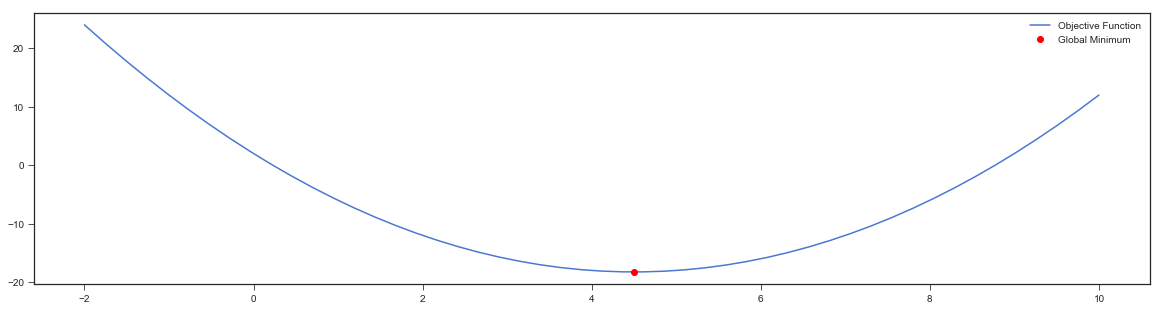

In [4]:
def h(x):
    return 2 - 9*x + x**2

_result = minimize(fun=h, x0=np.random.randn())
# report
print("Minimizer:", _result.x)
print("Message:", _result.message)
print("Success:", _result.success)

# visualization
_t = np.linspace(-2, 10)
plt.plot(_t, h(_t), label='Objective Function')
plt.plot(_result.x, h(_result.x), 'ro', label='Global Minimum')
plt.legend();

## Linear Regression

Find a function $f: \mathcal{X} \rightarrow \mathcal{Y}$, such that:
$$f(\mathbf{X}) = \mathbf{X} * w \approx \mathbf{y}$$

### True target function:
$$g_{true}(x) = 7x - 3, \quad x \in \mathcal{R}$$

In [5]:
# target function
def g_true(x):
    return 7*x - 3

### Observed target function:
$$g(x) = 7x - 3 + \epsilon, \quad x \in \mathcal{R} \text{ and } \epsilon \sim \mathcal{N}(0,1)$$

In [6]:
# observation function
def g(x):
    return g_true(x) + np.random.normal(0, 1, len(x))

### Dataset

In [7]:
x = np.linspace(-10, 10)
y = g(x)

### Preprocessing

In [8]:
# add a columns of ones in x
#  x  ->    X
# [1] -> [1, 1]
# [3] -> [1, 3]
# [7] -> [1, 7]
X = np.ones((len(x), 2))
X[:, 1] = x

### Functioncal Programming Note
`Use high-order functions to abstract calculations`

In [9]:
def single_add(x, y, z):
    # do stuff with x, y, z
    return x + y + z

print("Single Addition: 1 + 2 + 3 =", single_add(1,2,3))

def high_order_add(x, y):
    def cyrrying_add(z):
        return x + y + z
    return cyrrying_add

print("Cyrrying Addition: 1 + 2 + 3 =", high_order_add(1,2)(3))

Single Addition: 1 + 2 + 3 = 6
Cyrrying Addition: 1 + 2 + 3 = 6


### Mean Squared Error (L2-Norm Error)
$$MSE(\mathbf{X}, \mathbf{y}, w) = \frac{1}{2k} \sum_{i=1}^{k} (y_{i} - w_{i} * x_{i})^{2}$$

In [10]:
# high-order function
def loss(X, y):
    # mean squared error loss function
    def _mse(w):
        assert(len(X) == len(y))
        k = len(X)
        sum = 0
        for (xi, yi) in zip(X, y):
            sum += (yi - np.dot(xi, w))**2
        return sum/(2*k)
    return _mse

Optimal weights: [-2.88508346  6.99378881]
True weights: [-3, 7]


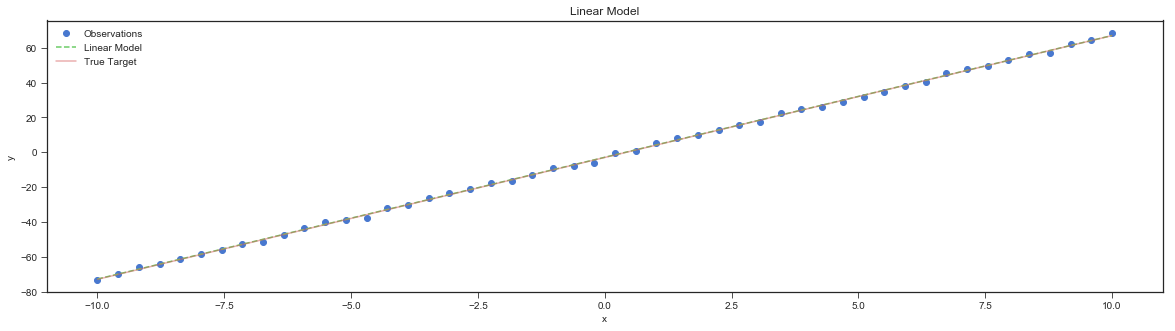

In [11]:
result = minimize(loss(X, y), [0,0])
w = result.x
print("Optimal weights:", w)
print("True weights:", [-3, 7])

plt.title("Linear Model")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, y, 'o', label='Observations')
plt.plot(x, np.dot(X, w), '--', label='Linear Model')
plt.plot(x, g_true(x), label='True Target', alpha=0.5)
plt.legend();

### 3D Optimization Surface

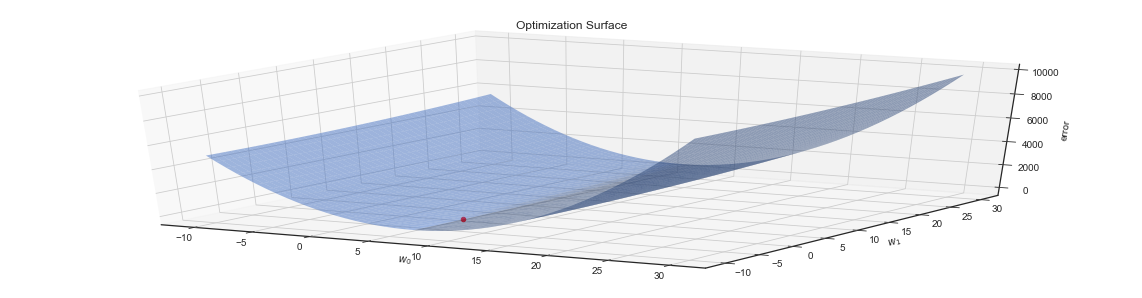

In [12]:
from mpl_toolkits.mplot3d import Axes3D
__loss = loss(X, y)
b, m = np.meshgrid(np.linspace(-10, 30, 50), np.linspace(-10, 30, 50))
zs = np.array([__loss([_b, _m]) for _b, _m in zip(np.ravel(b), np.ravel(m))])
Z = zs.reshape(m.shape)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(m, b, Z, rstride=1, cstride=1, alpha=0.5)
ax.scatter(w[1], w[0], __loss(w), color='red')
ax.set_title('Optimization Surface')
ax.set_xlabel('$w_{0}$')
ax.set_ylabel('$w_{1}$')
ax.set_zlabel('error');

### Task (L1-Norm Error)

Mean Squared Error (MSE) is often called also **L2-Norm Error**, since the square (L2-Norm) of the prediction error is used.
The **L1-Norm Error** term is used for the absolute value of the prediction error, such that:
$$E_{L1}(\mathbf{X}, \mathbf{y}, w) = \frac{1}{2k} \sum_{i=1}^{k} |y_{i} - w_{i} * x_{i}|$$

**TODO**<br>
Use `scipy.optimize.minimize` function to minimize the L1-Norm Error of the provided data `(X, y)`.<br><br>
<em>Hint</em>: Reimplement the `loss` function to calculate the L1-Norm Error, instead of the MSE.

Optimal weights: [-2.88508346  6.99378881]
True weights: [-3, 7]


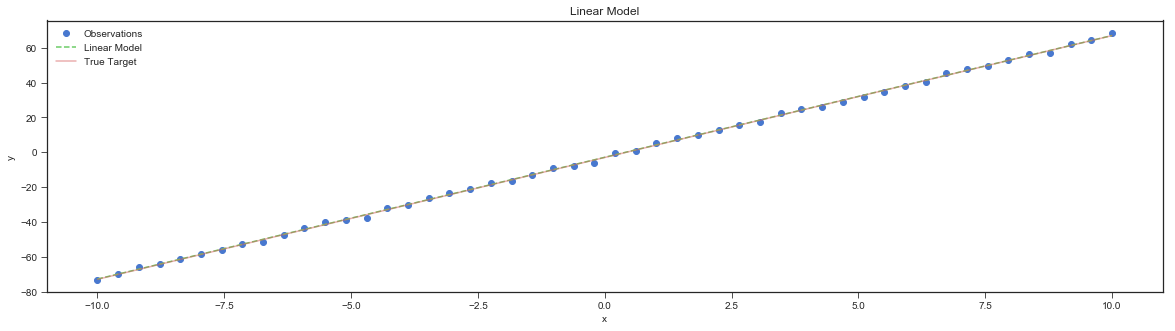

In [13]:
# high-order function
def _loss(X, y):
    # mean squared error loss function
    def _l1(w):
        assert(len(X) == len(y))
        k = len(X)
        sum = 0
        for (xi, yi) in zip(X, y):
            sum += np.abs(yi - np.dot(xi, w))
        return sum/(2*k)
    return _l1

_result = minimize(_loss(X, y), [0,0])
_w = result.x
print("Optimal weights:", _w)
print("True weights:", [-3, 7])

plt.title("Linear Model")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, y, 'o', label='Observations')
plt.plot(x, np.dot(X, _w), '--', label='Linear Model')
plt.plot(x, g_true(x), label='True Target', alpha=0.5)
plt.legend();